Titanic Classification : Make a system which tells whether the person will be save from sinking. What factors were most likely lead to success-socio-economic status, age, gender and more

dataset link :- https://www.kaggle.com/competitions/titanic/data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:

train_data = pd.read_csv('/content/drive/MyDrive/titanic/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/titanic/test.csv')


In [4]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
test_data


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [6]:

train_data = train_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
test_data = test_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)


In [7]:
train_data


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [8]:

train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)


In [9]:

train_data['Sex'] = train_data['Sex'].map({'female': 0, 'male': 1})
test_data['Sex'] = test_data['Sex'].map({'female': 0, 'male': 1})

train_data['Embarked'] = train_data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
test_data['Embarked'] = test_data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})


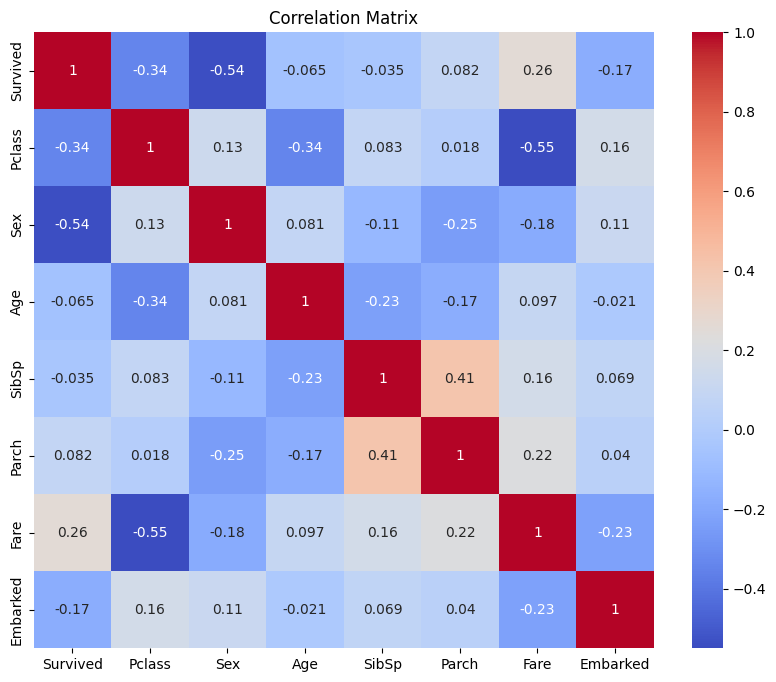

In [10]:

plt.figure(figsize=(10, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


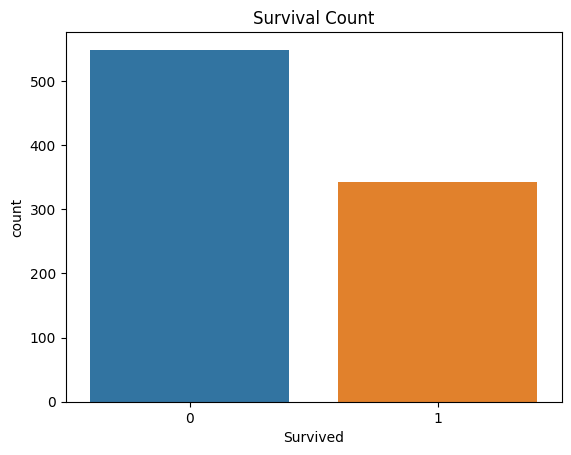

In [11]:

sns.countplot(x='Survived', data=train_data)
plt.title('Survival Count')
plt.show()


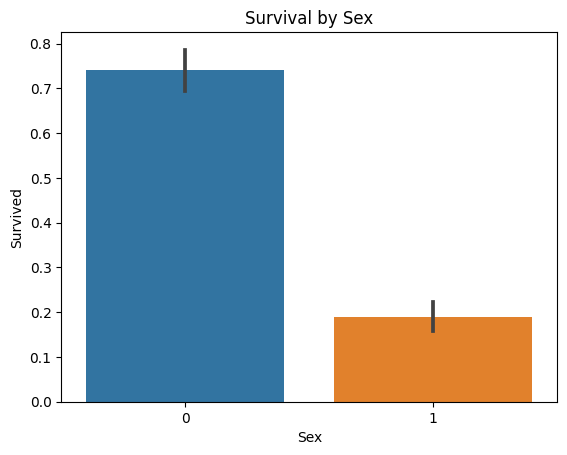

In [12]:

sns.barplot(x='Sex', y='Survived', data=train_data)
plt.title('Survival by Sex')
plt.show()


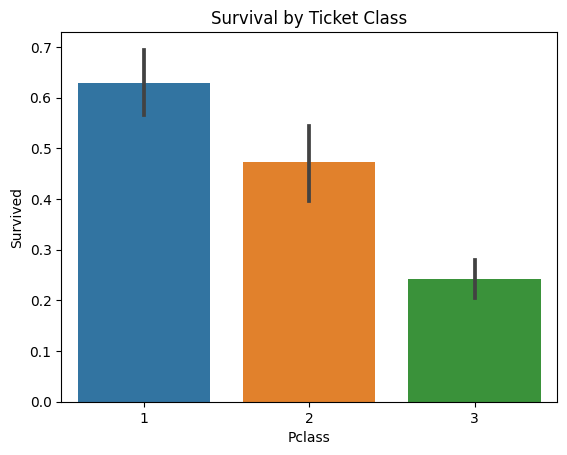

In [13]:

sns.barplot(x='Pclass', y='Survived', data=train_data)
plt.title('Survival by Ticket Class')
plt.show()


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer


X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

imputer = SimpleImputer(strategy='median')
imputer.fit(X)
X_imputed = pd.DataFrame(imputer.transform(X), columns=X.columns)
test_data_imputed = pd.DataFrame(imputer.transform(test_data), columns=test_data.columns)


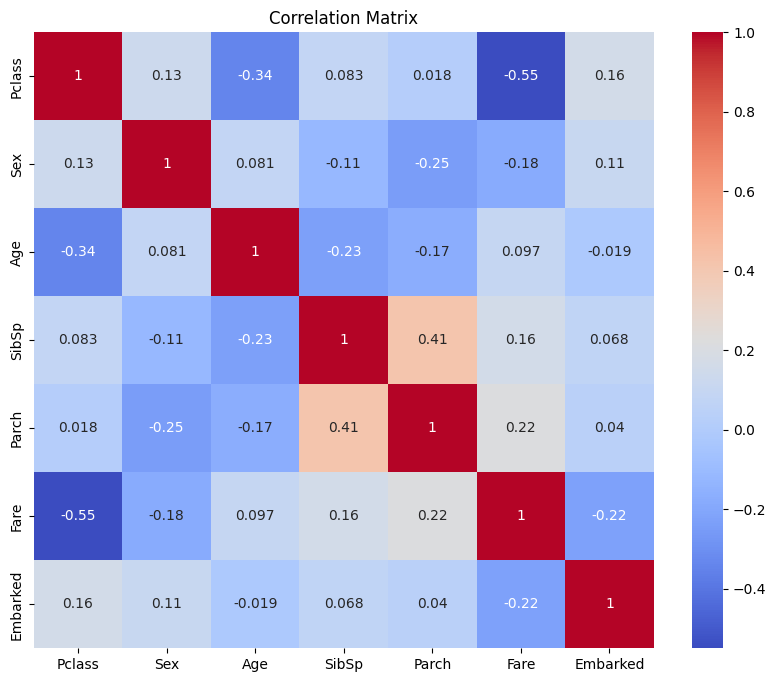

In [15]:

plt.figure(figsize=(10, 8))
sns.heatmap(X_imputed.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



In [16]:

X = train_data.drop('Survived', axis=1)
y = train_data['Survived']


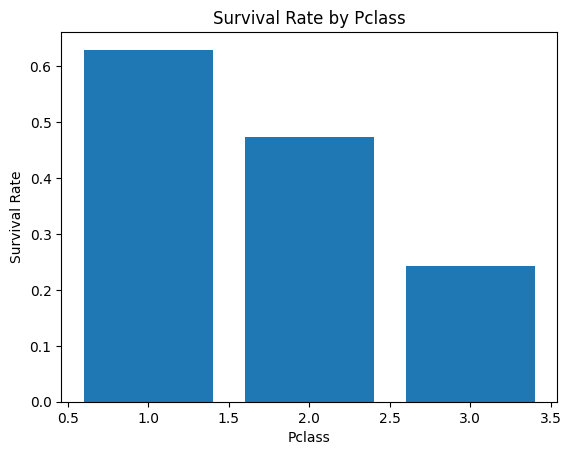

In [17]:
import matplotlib.pyplot as plt

survival_rate = train_data.groupby('Pclass')['Survived'].mean()

plt.bar(survival_rate.index, survival_rate.values)
plt.xlabel('Pclass')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Pclass')
plt.show()

In [18]:

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)

clf = SVC(random_state=42)
clf.fit(X_train_imputed, y_train)

X_test_imputed = imputer.transform(X_val)

y_pred = clf.predict(X_test_imputed)

accuracy_rf = accuracy_score(y_val, y_pred)
print('Testing Accuracy:', accuracy_rf)

Testing Accuracy: 0.659217877094972


In [20]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=42)
clf.fit(X_train_imputed, y_train)

y_pred = clf.predict(X_test_imputed)

accuracy_lr = accuracy_score(y_val, y_pred)
print('Testing Accuracy:', accuracy_lr)

Testing Accuracy: 0.8100558659217877


In [21]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_imputed, y_train)

y_pred = clf.predict(X_test_imputed)

accuracy_dt = accuracy_score(y_val, y_pred)
print('Testing Accuracy:', accuracy_dt)

Testing Accuracy: 0.7821229050279329


In [22]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(random_state=42)
clf.fit(X_train_imputed, y_train)

y_pred = clf.predict(X_test_imputed)

accuracy_gb = accuracy_score(y_val, y_pred)
print('Testing Accuracy:', accuracy_gb)

Testing Accuracy: 0.8100558659217877


In [23]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf.fit(X_train_imputed, y_train)

y_pred = clf.predict(X_test_imputed)

accuracy_knn = accuracy_score(y_val, y_pred)
print('Testing Accuracy:', accuracy_knn)

Testing Accuracy: 0.7039106145251397


In [24]:
import lightgbm as lgb

clf = lgb.LGBMClassifier(random_state=42)
clf.fit(X_train_imputed, y_train)

y_pred = clf.predict(X_test_imputed)

accuracy_lgbm = accuracy_score(y_val, y_pred)
print('Testing Accuracy:', accuracy_lgbm)

Testing Accuracy: 0.8212290502793296


In [25]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 6.5 MB/s eta 0:00:00


In [26]:
from catboost import CatBoostClassifier

clf = CatBoostClassifier(random_state=42, verbose=False)
clf.fit(X_train_imputed, y_train)
y_pred = clf.predict(X_test_imputed)

accuracy_catboost = accuracy_score(y_val, y_pred)
print('Testing Accuracy:', accuracy_catboost)

Testing Accuracy: 0.8268156424581006


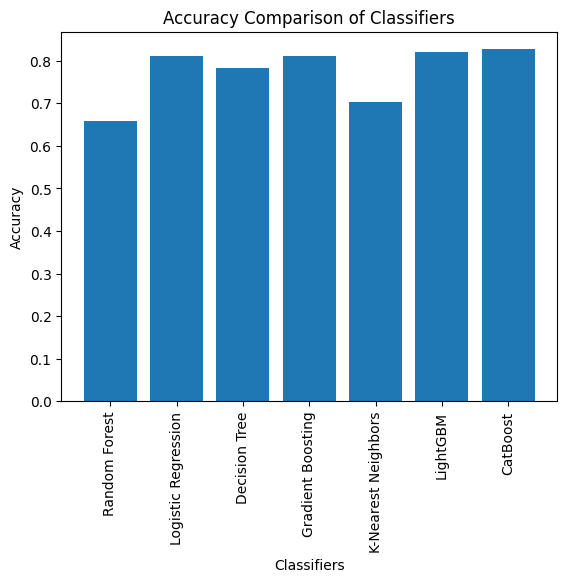

In [27]:
import matplotlib.pyplot as plt

classifiers = ['Random Forest','Logistic Regression', 'Decision Tree', 'Gradient Boosting', 'K-Nearest Neighbors', 'LightGBM', 'CatBoost']
accuracies = [accuracy_rf, accuracy_lr, accuracy_dt, accuracy_gb, accuracy_knn, accuracy_lgbm, accuracy_catboost]

plt.bar(classifiers, accuracies)
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Classifiers')
plt.xticks(rotation=90)
plt.show()

In [28]:


test_predictions = clf.predict(X_test_imputed)

In [37]:
test_data = pd.read_csv('/content/drive/MyDrive/titanic/test.csv')

test_data = test_data.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1)
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)
test_data['Sex'] = test_data['Sex'].map({'female': 0, 'male': 1})
test_data['Embarked'] = test_data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

test_data_imputed = pd.DataFrame(imputer.transform(test_data), columns=test_data.columns)

test_predictions = clf.predict(test_data_imputed)

example_submission = pd.read_csv('/content/drive/MyDrive/titanic/gender_submission.csv')

submission = pd.DataFrame({'PassengerId': test_data.index + 892, 'Survived': test_predictions})

submission.loc[test_data['Sex'] == 0, 'Survived'] = example_submission.loc[test_data['Sex'] == 0, 'Survived']

submission.to_csv('submission.csv', index=False)
print("Submission file created successfully!")


Submission file created successfully!


In [39]:
Submissionfilecreatedsuccessfully = pd.read_csv('/content/submission.csv')
print(Submissionfilecreatedsuccessfully)

     PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]


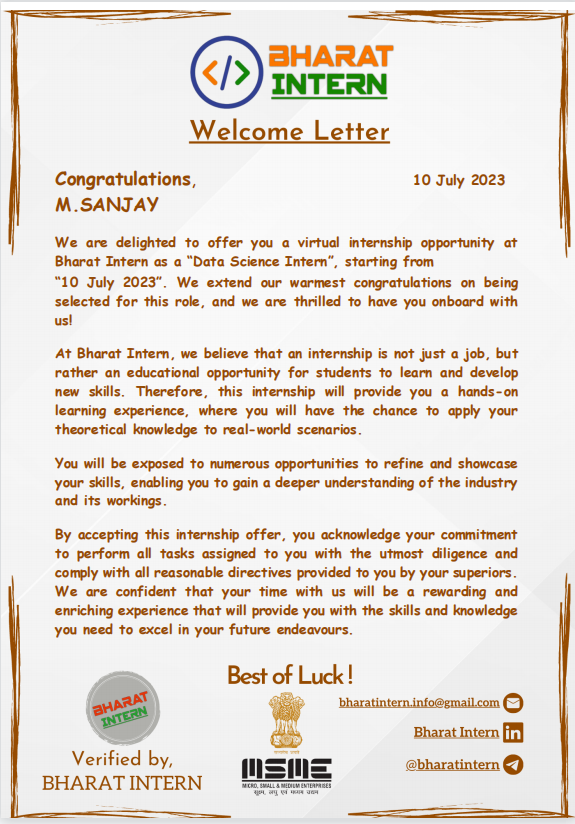

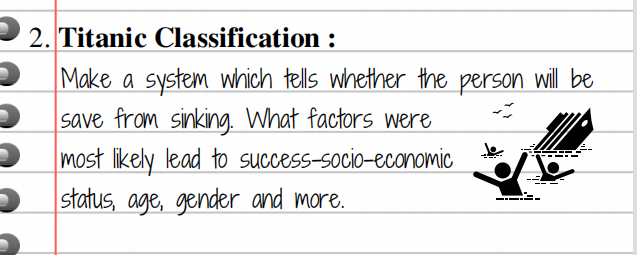